In [ ]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

### preprocess the original data

In [ ]:
dotlowell = pd.read_excel("/Users/linjiaqi/Desktop/CFJJ/DOTLowell_April2021.xlsx")
dotlowell = dotlowell.drop(columns = ['Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'])
caseN = dotlowell.shape[0]


In [ ]:
#pd.options.mode.chained_assignment = None
for index in range(len(dotlowell)):
    if(dotlowell['AM-PM'][index]== "PM"):
        dotlowell['Time-HH'][index] += 12

In [ ]:
dotlowell = dotlowell.drop(columns = ['AM-PM'])
dotlowell.head()

,Issuing Agency,OfficerID,Event Date,Time-HH,Time-MM,Citation #,Citation Type,Offense,Offense Description,Location Name,Race,Gender,Year of Birth,Searched,PlateType,Vhc State
0,Lowell Police Dept.,841.0,2021-04-01,19.0,38.0,952155AA,WARN,9020B0,"INSPECTION/STICKER, NO * c90 §20",Lowell,HISP,MALE,1992,N,PAN,MA
1,Lowell Police Dept.,773.0,2021-04-01,19.0,20.0,T2658073,WARN,9020B0,"INSPECTION/STICKER, NO * c90 §20",Lowell,BLACK,MALE,1980,N,PAN,MA
2,Lowell Police Dept.,783.0,2021-04-01,22.0,45.0,T2659169,WARN,8991,"STOP/YIELD, FAIL TO * c89 §9",Lowell,ASIAN,MALE,1976,N,PAN,MA
3,Lowell Police Dept.,569.0,2021-04-01,13.0,35.0,T2659673,CIVIL,8991,"STOP/YIELD, FAIL TO * c89 §9",Lowell,WHITE,MALE,1985,N,PAN,MA
4,Lowell Police Dept.,15765.0,2021-04-01,12.0,0.0,T2659741,WARN,909D0,WINDOW OBSTRUCTED/NONTRANSPARENT * c90 §9D,Lowell,HISP,MALE,2002,N,PAN,MA


### histogram for cases number by time 

In [ ]:
sum(dotlowell['Time-HH'].isna())

11

In [ ]:
Ncase_time = dotlowell.groupby(['Time-HH']).count()['Time-MM']
index = Ncase_time.index.tolist()
lNcase_time = Ncase_time.tolist()
PNcase_time = [x/caseN for x in lNcase_time]
Ncase_time = {'index':Ncase_time.index, 'population':lNcase_time,'Percentage':PNcase_time}
Ncase_time = pd.DataFrame(Ncase_time)
Ncase_time

,index,population,Percentage
0,1.0,1,0.000686
1,2.0,6,0.004118
2,4.0,2,0.001373
3,5.0,5,0.003432
4,6.0,5,0.003432
5,7.0,60,0.041181
6,8.0,137,0.094029
7,9.0,131,0.089911
8,10.0,92,0.063143
9,11.0,94,0.064516


<BarContainer object of 23 artists>

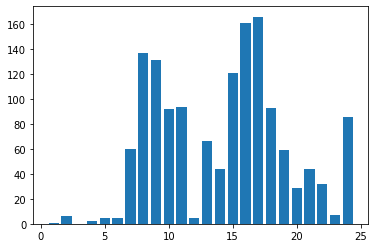

In [ ]:
plt.bar(Ncase_time['index'] , Ncase_time['population'])

### histogram for cases number by year of birth 

replace 9999 in year of birth to na 

In [ ]:
Ncase_yearB = dotlowell.groupby([]).count()['Time-MM']
Ncase_yearB

Year of Birth
1934     1
1935     1
1936     1
1939     0
1942     1
        ..
2001    47
2002    28
2003    16
2004     4
9999     5
Name: Time-MM, Length: 67, dtype: int64

In [ ]:
Ncase_year = dotlowell.groupby(['Year of Birth']).count()['Time-MM']
Ncase_year = Ncase_year.drop(labels = [9999])
index = Ncase_year.index.tolist()
lNcase_year = Ncase_year.tolist()
PNcase_year = [x/caseN for x in lNcase_year]
Ncase_year = {'index':Ncase_year.index, 'population':lNcase_year,'Percentage':PNcase_year}
Ncase_year = pd.DataFrame(Ncase_year)
Ncase_year

,index,population,Percentage
0,1934,1,0.000686
1,1935,1,0.000686
2,1936,1,0.000686
3,1939,0,0.000000
4,1942,1,0.000686
...,...,...,...
61,2000,35,0.024022
62,2001,47,0.032258
63,2002,28,0.019218
64,2003,16,0.010981


<BarContainer object of 66 artists>

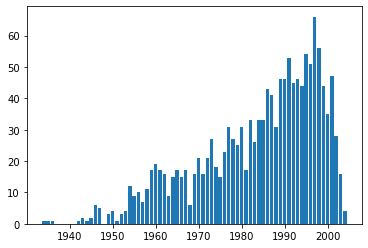

In [ ]:
plt.bar(Ncase_year['index'] , Ncase_year['population'])